In [64]:
#syntax to check version of python
import sys
print('Python: {}'.format(sys.version))

Python: 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


In [65]:
#syntax to check version of libraries
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Scipy: 1.7.3
Numpy: 1.21.5
Matplotlib: 3.5.1
Pandas: 1.4.2
Sklearn: 1.0.2


In [66]:
#importing dependencies
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [67]:
#loading the dataset
data = pandas.read_csv('documents/datasets/iris_dataset.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
#finding the dimesions of dataset
data.shape

(150, 5)

In [69]:
#renaming a column name
data.rename(columns={"target":"class"},inplace = True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
#statistical summary
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
#class distribution
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

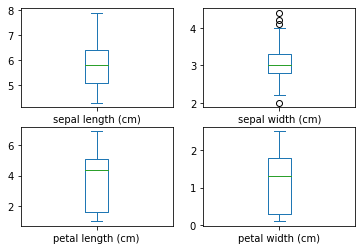

In [87]:
#univariate plot - box and whisker plot
data.plot(kind = 'box',subplots=True,layout=(2,2), sharex = False, sharey = False)
pyplot.show()

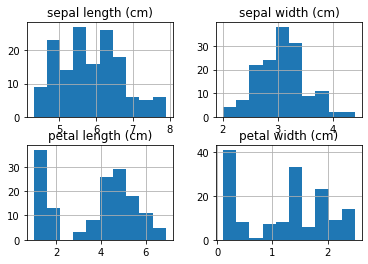

In [88]:
#histogram of the variables
data.hist()
pyplot.show()

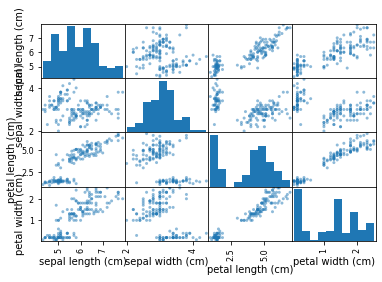

In [89]:
#multivariate plots
scatter_matrix(data)
pyplot.show()

In [90]:
#creating a validation set by splitting the data
array = data.values
x = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(x,y, test_size= 0.2, random_state=1)

In [91]:
#Linear aglorithms
#Logistic Regression
#Linear Discriminant Analysis
#Non linear algorithms
#K nearest neighbours
#Classification and Regression Trees
#Gaussian Naive Bayes
#Support Vector Machines

#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))


In [92]:
#evaluate the models by using ten fold cross validation
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, shuffle = True,random_state=1)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


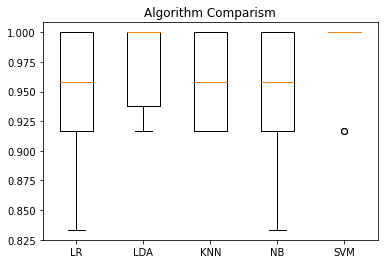

In [93]:
# comparing models
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparism')
pyplot.show()

In [94]:
#make predictions on SVM
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [96]:
#evaluating our predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

